# 2019-yil uchun "Həzi Aslanov-2" supermarketidagi savdo holati


In [56]:
#1 Barcha kerakli kutubxonalarni chaqirib olamiz
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

In [57]:
#2 Kerakli datasetni githubdan df o'zgaruvchisiga yuklab olaman.
df = pd.read_csv("https://github.com/hikmatilloahatov/Azarbaijan-supermarkets-datasets/blob/main/H%C9%99zi%20Aslanov-2.csv?raw=true", usecols=list(range(1, 6)))
df.head(10)

,mahsulot_nomi,mahsulot_turi,mahsulot_narhi,sotilgan_vaqti,bonus_karta
0,KOLBASA HILAL SINYUQA BISMIS KG,Kolbasa va sosiskalar,10.05,2019-07-08,True
1,VITA 1000 1.5LT QAZSIZ SU PL/Q,Suvlar,0.69,2019-07-08,True
2,BERMUD 1LT ARAQ,Aroq,9.15,2019-07-08,True
3,BISPOL SAM YUMURU AG ART.NR:SK80-190,Maishiy buyumlar,5.55,2019-07-08,True
4,KOLBASA H.D SERVELAT QUZU ETLI KG,Kolbasa va sosiskalar,11.45,2019-07-08,True
5,CRISPICO 125GR SNACK SEKERLI,Shirinliklar,2.55,2019-07-08,True
6,SUPER SUN 200GR BITKI-YAG SPREDI 82% KERELI,Yog'lar,1.30,2019-07-08,True
7,ORION 1.8LT QABYUYAN MAYE CESID,Kiyim-kechak uchun,3.05,2019-07-08,True
8,HOBBY LIFE NE ALSAN 3.5 AZN,Plastik idishlar,3.50,2019-09-29,True
9,CER.ALCA QURUSU KUFTELIK KG,Quruq mevalar,5.55,2019-09-29,True


In [62]:
#3 DataFramening barcha ustunlari haqidagi ma'lumotga ega bo'lib olaman
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21442 entries, 0 to 21441
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   mahsulot_nomi   21442 non-null  object        
 1   mahsulot_turi   21442 non-null  object        
 2   mahsulot_narhi  21442 non-null  float64       
 3   sotilgan_vaqti  21442 non-null  datetime64[ns]
 4   bonus_karta     21442 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), object(2)
memory usage: 691.1+ KB


In [63]:
#4 DataFrameda NaN qiymatlar bor yoki yo'qligini tekshiraman
df.isnull().sum()

mahsulot_nomi     0
mahsulot_turi     0
mahsulot_narhi    0
sotilgan_vaqti    0
bonus_karta       0
dtype: int64

In [64]:
#5 "sotilgan_vaqti" ustunining ma'lumot turini objectdan datetime ma'lumot turiga o'tkazaman
df['sotilgan_vaqti'] = pd.to_datetime(df['sotilgan_vaqti'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21442 entries, 0 to 21441
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   mahsulot_nomi   21442 non-null  object        
 1   mahsulot_turi   21442 non-null  object        
 2   mahsulot_narhi  21442 non-null  float64       
 3   sotilgan_vaqti  21442 non-null  datetime64[ns]
 4   bonus_karta     21442 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), object(2)
memory usage: 691.1+ KB


In [65]:
#6 Har bir oy uchun ma'lumotlar sonini ko'rib olaman
for i in range(1, 13):
  print(df[df['sotilgan_vaqti'].dt.month == i].shape[0])

2077
2060
2192
2155
2281
1915
2107
2186
2266
2181
22
0


In [66]:
#7 Demak tushunamanki, 12-oy uchun hech qanday ma'lumot yo'q, 11-oyda esa bor ammo ma'lumotlar juda oz 
# shuning uchun 11-oydagi ma'lumotlarni tashlab yuborsam bo'laveradi
df.drop(df[df['sotilgan_vaqti'].dt.month == 11].index, axis=0, inplace=True)
for i in range(1, 13):
  print(df[df['sotilgan_vaqti'].dt.month == i].shape[0])

2077
2060
2192
2155
2281
1915
2107
2186
2266
2181
0
0


In [67]:
#8 DataFrameni bir ko'rib olaman
df

,mahsulot_nomi,mahsulot_turi,mahsulot_narhi,sotilgan_vaqti,bonus_karta
0,KOLBASA HILAL SINYUQA BISMIS KG,Kolbasa va sosiskalar,10.05,2019-07-08,True
1,VITA 1000 1.5LT QAZSIZ SU PL/Q,Suvlar,0.69,2019-07-08,True
2,BERMUD 1LT ARAQ,Aroq,9.15,2019-07-08,True
3,BISPOL SAM YUMURU AG ART.NR:SK80-190,Maishiy buyumlar,5.55,2019-07-08,True
4,KOLBASA H.D SERVELAT QUZU ETLI KG,Kolbasa va sosiskalar,11.45,2019-07-08,True
...,...,...,...,...,...
21437,INNAMORE COLLANT BELLA 40DEN KALQOTKA 4,Paypoq,4.75,2019-01-22,False
21438,IVANOVKA BAGLARI 0.75L MEDRESE SERAB,Vinolar,9.20,2019-01-22,False
21439,KITCHEN PRINCE BALTA PLASTIK QULPLU,Maishiy buyumlar,8.55,2019-01-22,False
21440,CALGON 1600GR KIRECE QARSI,"Yuvish vositalari, tozalagichlar",16.65,2019-01-22,False


In [70]:
#9 2019-yilda "Həzi Aslanov-2" supermarketida qaysi mahsulot turi nechta sotilgani haqida ma'lumotlarni olaman
df['mahsulot_turi'].value_counts().to_frame()

,mahsulot_turi
Shirinliklar,5050
Maishiy buyumlar,1133
"Yuvish vositalari, tozalagichlar",1071
Mevali sharbatlar,996
Idish-tovoq,792
...,...
Suzma,23
Shampan,17
Kefir,17
Tayyor ovqatlar,14


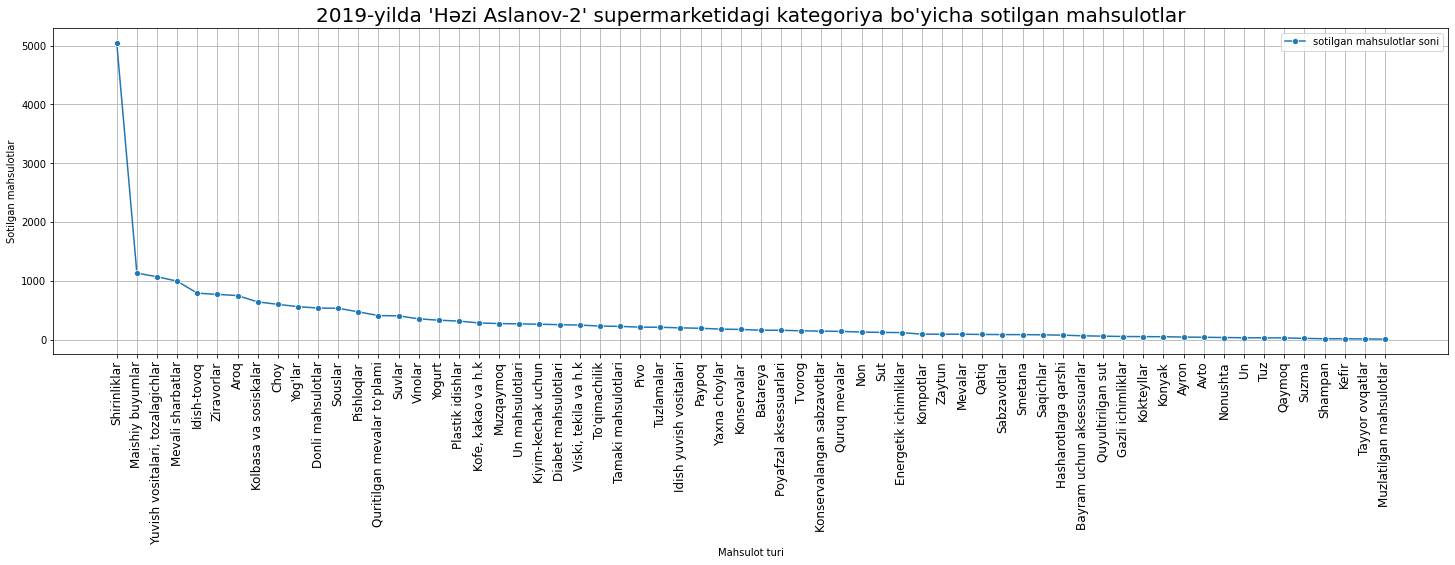

In [71]:
#9 Visualization
plt.figure(figsize=(25, 6))
sns.lineplot(data=df['mahsulot_turi'].value_counts().to_frame(), markers="o")

plt.xlabel("Mahsulot turi")
plt.ylabel("Sotilgan mahsulotlar")
plt.title("2019-yilda 'Həzi Aslanov-2' supermarketidagi kategoriya bo'yicha sotilgan mahsulotlar", fontsize=20)

plt.grid()
plt.legend(["sotilgan mahsulotlar soni"])
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [72]:
#10 2019-yilda "Həzi Aslanov-2" supermarketida qaysi mahsulot turi qancha pul olib kelgani haqida ma'lumotni olaman
df.pivot_table(index=['mahsulot_turi'],
              values=['mahsulot_narhi'], 
              aggfunc=['sum'])

,sum
,mahsulot_narhi
mahsulot_turi,
Aroq,11092.53
Avto,196.97
Ayron,34.80
Batareya,672.00
Bayram uchun aksessuarlar,199.89
...,...
Yog'lar,4970.43
Yogurt,407.54


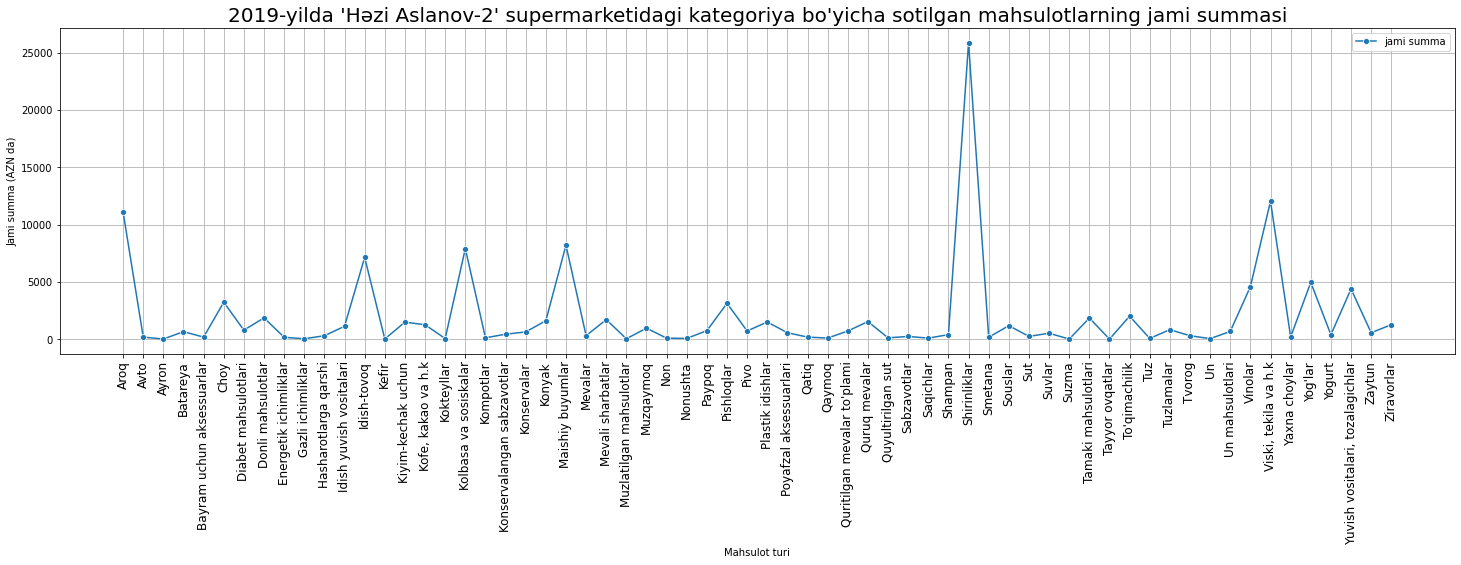

In [73]:
#10 Visualization
plt.figure(figsize=(25, 6))
sns.lineplot(data=df.pivot_table(index=['mahsulot_turi'], values=['mahsulot_narhi'], aggfunc=['sum']),
             markers="o")

plt.xlabel("Mahsulot turi")
plt.ylabel("Jami summa (AZN da)")
plt.title("2019-yilda 'Həzi Aslanov-2' supermarketidagi kategoriya bo'yicha sotilgan mahsulotlarning jami summasi", fontsize=20)

plt.grid()
plt.legend(["jami summa"])
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [74]:
#11 2019-yilda "Həzi Aslanov-2" supermarketida nechta mijoz mahsulotni bonus karta orqali 
# xarid qilgan yoki qilmagani haqida haqida ma'lumotni olaman
bonus_df = df['bonus_karta'].value_counts().to_frame().T
bonus_df.columns = ["Bonus_kartasiz", "Bonus_karta_orqali"]
bonus_df.index = pd.Index(['xaridlar'])
bonus_df

,Bonus_kartasiz,Bonus_karta_orqali
xaridlar,10737,10683


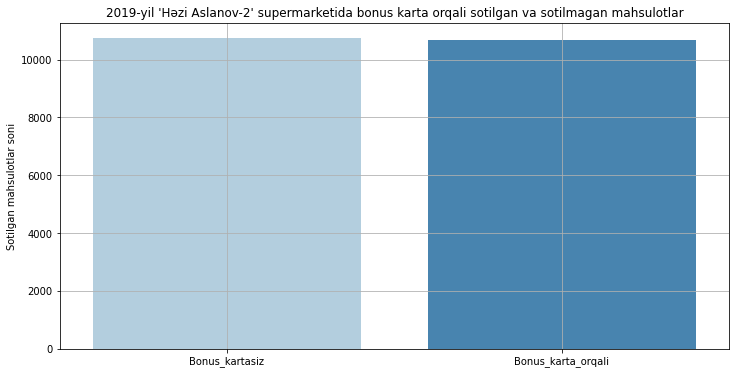

In [75]:
#11 Visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=bonus_df, palette="Blues")

plt.title("2019-yil 'Həzi Aslanov-2' supermarketida bonus karta orqali sotilgan va sotilmagan mahsulotlar")
plt.ylabel("Sotilgan mahsulotlar soni")

plt.grid()
plt.show()

In [76]:
#12 2019-yilda "Həzi Aslanov-2" supermarketida oylarga nisbatan xaridlar soni haqida ma'lumotlarni aniqlab olaman
oylik_xaridlar = list()
oy_nomlari = ['Yanvar', 'Fevral', 'Mart', 'Aprel', 'May', 'Iyun', 'Iyul', 'Avgust', 'Sentabr', 'Oktabr']
for i in range(1, 11):
  oylik_xaridlar.append(df[df['sotilgan_vaqti'].dt.month == i].shape[0])
df1 = pd.DataFrame(index=oy_nomlari, data=oylik_xaridlar, columns=['oylik_xaridlar'])
df1

,oylik_xaridlar
Yanvar,2077
Fevral,2060
Mart,2192
Aprel,2155
May,2281
Iyun,1915
Iyul,2107
Avgust,2186
Sentabr,2266
Oktabr,2181


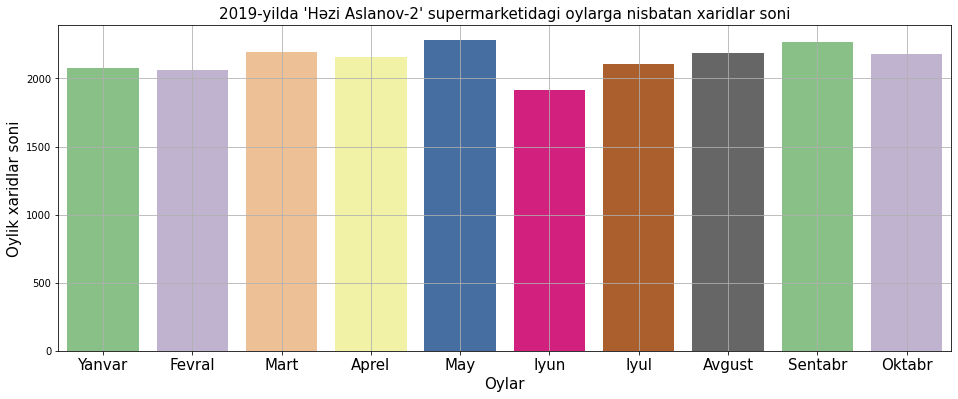

In [77]:
#12 Visualization
plt.figure(figsize=(16, 6))
sns.barplot(x=df1.index, y=df1['oylik_xaridlar'], palette='Accent')

plt.title("2019-yilda 'Həzi Aslanov-2' supermarketidagi oylarga nisbatan xaridlar soni", fontsize=15)
plt.xlabel("Oylar", fontsize=15)
plt.ylabel("Oylik xaridlar soni", fontsize=15)

plt.xticks(fontsize=15)
plt.grid()
plt.show()

In [78]:
#13 2019-yilda "Həzi Aslanov-2" supermarketida hafta kunlariga nisbatan xaridlar soni
hafta_kunlari_xaridlar = list()
kun_nomlari = ['Dushanba', 'Seshanba', 'Chorshanba', 'Payshanba', 'Juma', 'Shanba', 'Yakshanba']
for i in range(0, 7):
  hafta_kunlari_xaridlar.append(df[df['sotilgan_vaqti'].dt.weekday == i].shape[0])
df2 = pd.DataFrame(index=kun_nomlari, data=hafta_kunlari_xaridlar, columns=['xaridlar'])
df2

,xaridlar
Dushanba,2893
Seshanba,3084
Chorshanba,3003
Payshanba,3243
Juma,3074
Shanba,3089
Yakshanba,3034


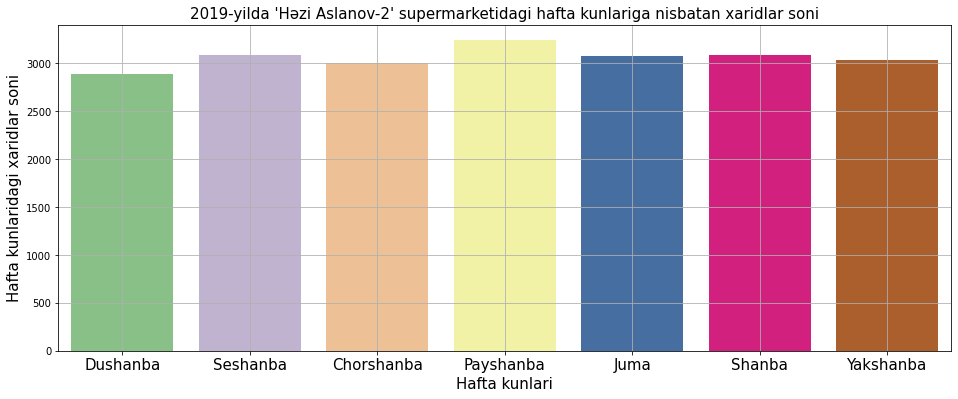

In [79]:
#13 Visualization
plt.figure(figsize=(16, 6))
sns.barplot(x=df2.index, y=df2['xaridlar'], palette='Accent')

plt.title("2019-yilda 'Həzi Aslanov-2' supermarketidagi hafta kunlariga nisbatan xaridlar soni", fontsize=15)
plt.xlabel("Hafta kunlari", fontsize=15)
plt.ylabel("Hafta kunlaridagi xaridlar soni", fontsize=15)

plt.xticks(fontsize=15)
plt.grid()
plt.show()

In [80]:
#14 2019-yilda "Həzi Aslanov-2" supermarketida oy kunlariga nisbatan xaridlar soni haqida ma'lumotlarni aniqlab olaman
oy_kunlari_xaridlar = list()
kunlar = list(range(1, 32))
for i in range(1, 32):
  oy_kunlari_xaridlar.append(df[df['sotilgan_vaqti'].dt.day == i].shape[0])
df3 = pd.DataFrame(index=kunlar, data=oy_kunlari_xaridlar, columns=['xaridlar'])
df3

,xaridlar
1,734
2,714
3,656
4,733
5,729
6,680
7,736
8,725
9,697
10,724


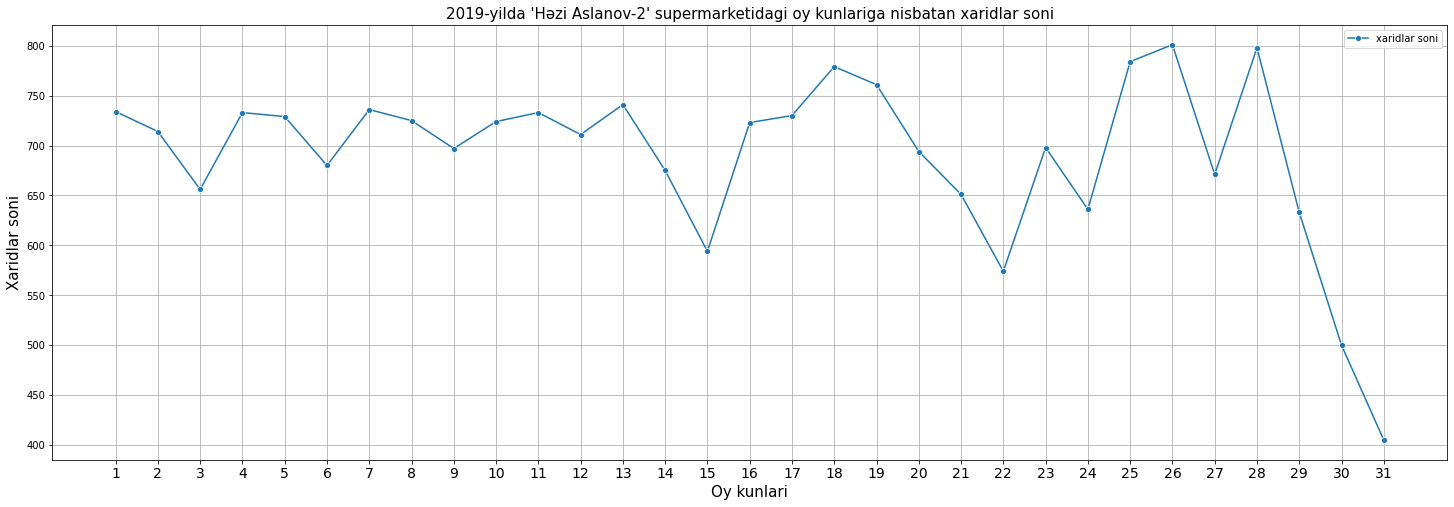

In [81]:
#14 Visualization
plt.figure(figsize=(25, 8))
sns.lineplot(data=df3, markers="o")

plt.title("2019-yilda 'Həzi Aslanov-2' supermarketidagi oy kunlariga nisbatan xaridlar soni", fontsize=15)
plt.xlabel("Oy kunlari", fontsize=15)
plt.ylabel("Xaridlar soni", fontsize=15)

plt.legend(["xaridlar soni"])
plt.grid()
plt.xticks(kunlar, fontsize=14)
plt.show()

In [82]:
#15 2019-yil 'Həzi Aslanov-2' supermarketidagi har bir oyning har bir kunidagi xaridlar sonini aniqlab olaman
# buning uchun while loopdan foydalandim
oy_sanalari = list()
oy = 1
kun = 1
while kun<=31 and oy<=10:
    oy_sanalari.append(df[(df['sotilgan_vaqti'].dt.month == oy) & (df['sotilgan_vaqti'].dt.day == kun)].shape[0])
    kun +=1
    if kun == 32:
        oy+=1
        kun=1

In [83]:
len(oy_sanalari)

310

In [84]:
arr = np.array(oy_sanalari).reshape(10, 31)

In [85]:
df5 = pd.DataFrame(index=oy_nomlari, data=arr, columns=list(range(1, 32)))

In [86]:
df5

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
Yanvar,79,83,66,93,88,52,60,78,71,61,52,51,97,74,46,40,88,87,43,63,69,47,67,20,76,71,75,107,80,29,64
Fevral,72,74,54,53,42,18,120,55,75,104,72,74,84,67,92,95,67,49,81,71,62,85,106,66,82,93,60,87,0,0,0
Mart,64,85,66,62,59,97,55,47,93,61,79,81,83,90,69,62,114,64,83,75,72,23,62,47,74,78,58,85,53,70,81
Aprel,62,73,105,100,72,98,73,117,54,79,56,92,62,55,57,74,54,115,52,73,76,41,52,62,85,88,80,62,31,55,0
May,66,78,25,98,107,80,71,44,55,44,77,85,57,81,52,69,42,42,61,128,70,64,47,110,75,114,115,84,67,68,105
Iyun,43,88,47,66,60,79,52,77,54,73,55,56,48,63,55,60,30,91,75,62,62,67,73,37,55,37,57,76,127,90,0
Iyul,83,72,66,57,62,65,67,122,49,74,102,73,61,59,57,78,88,102,113,45,39,42,56,73,90,66,26,46,56,56,62
Avgust,88,66,70,70,64,66,85,69,97,68,53,33,90,54,41,95,51,61,55,60,64,56,88,71,70,96,76,137,88,47,57
Sentabr,80,39,105,77,89,46,84,52,76,91,92,96,66,67,72,82,81,72,88,77,78,76,71,78,84,77,86,50,94,40,0
Oktabr,97,56,52,57,86,79,69,64,73,69,95,70,93,65,53,68,115,96,110,40,59,73,76,72,93,81,38,64,37,45,36


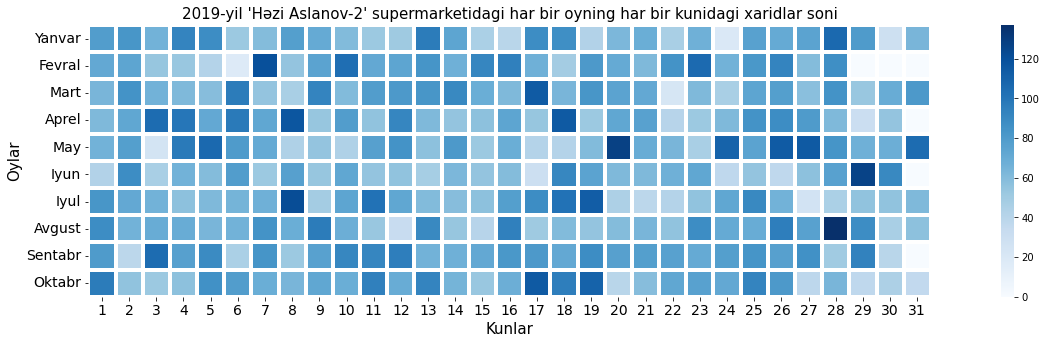

In [87]:
#15 Visualisation
plt.figure(figsize=(25, 5))
sns.heatmap(data=df5, linewidth=3, cmap="Blues", square=True)

plt.title("2019-yil 'Həzi Aslanov-2' supermarketidagi har bir oyning har bir kunidagi xaridlar soni", fontsize=15)
plt.xlabel("Kunlar", fontsize=15)
plt.ylabel("Oylar", fontsize=15)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

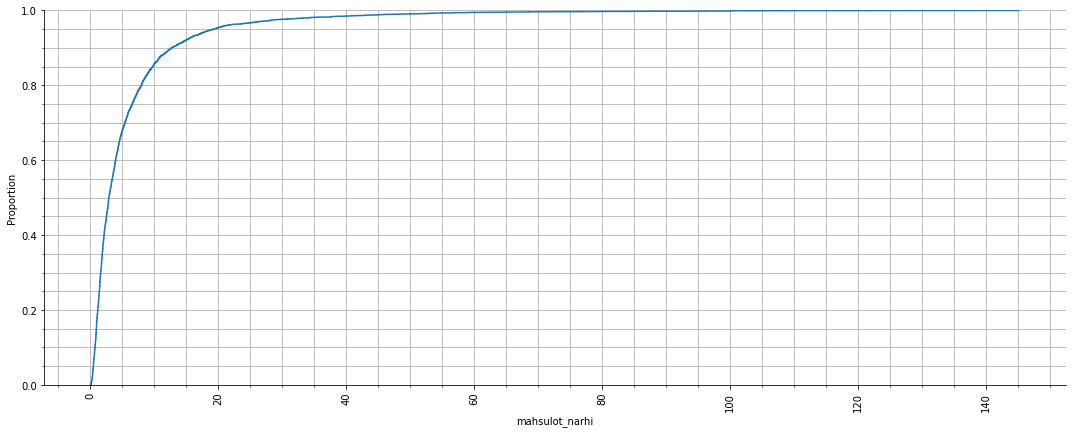

In [89]:
#16 Ko'rinadiki, sotilgan mahsulotlarning 50% i 3 azngacha, 90% i esa 14 azngacha bo'lgan mahsulotlar
sns.displot(data=df, x='mahsulot_narhi', kind='ecdf', height=6, aspect=2.5)
plt.xticks(rotation=90)
plt.grid(which='both')
plt.minorticks_on()
plt.show()